# **Mean, median, mode**

Hello and welcome to our exploration of "Central Tendencies: Mean, Median, and Mode." In this notebook, we're diving into the core concepts that tell us about the typical or central values within a dataset. You'll learn the definitions, get to grips with the formulas, and see these measures in action through hands-on examples.

We'll explore how unusual data points and the overall form of the data impact these central values, demonstrating their effects through real-life examples. Plus, we'll highlight how each measure can tell a different story about our data.

## Definition and main characteristics


<img src='images/mean.png'>

**Mean:**
The mean is the average of a set of numbers, calculated by adding them together and then dividing by the quantity of numbers.

**When to Use:** The mean is used when you want the average value. It's suitable for data that is symmetrically distributed without outliers.

**Characteristics:**
* Sensitive to outliers.
* Applicable to numerical/interval/ratio data.
* Best for normally distributed data (bell curve).
* Unique value for a given dataset.
* Example: Average test scores, average temperatures.

<img src='images/median.png'>

**Median:**
The median is the middle value in a sorted list of numbers. In a list with an odd number of elements, it is the central number; for an even number of elements, it is the average of the two central numbers.

**When to Use:** The median is ideal for skewed distributions or when dealing with outliers. It represents the middle value of a data set when ordered from least to greatest.

**Characteristics:**
* Not affected by outliers or extremely large/small values.
* Applicable to all data types except nominal.
* Useful for skewed distributions.
* Represents the 50th percentile.
* Example: Median household income, median property prices.

<img src='images/mode.png'>

**Mode:**
The mode is the most frequently occurring value in a dataset.

**When to Use:** The mode is best when you want to know the most frequently occurring value in your data set. It's particularly useful for categorical data.

**Characteristics:**
* Not affected by outliers.
* Applicable to both numerical and categorical data. Mode for continuous data may require intervals.
* Identifies the most common value. For continuous data, the mode is often referred to in the context of a probability density function rather than the raw data itself.
* There can be more than one mode (bimodal, multimodal) or no mode at all in a data set.
* Example: Most common shoe size sold, most preferred brand.

## Formulas
Below there are general formulas for these measures where they apply. We'll link the formulas to their definitions for clarity. To make them less abstract, we'll also demonstrate how to calculate each one in the following section.

**Mean (Arithmetic Mean):**
The mean is the sum of all individual values in the dataset, represented by x_i , divided by the total number of observations, represented by n.
$$
\text{Mean} (\mu) = \frac{\sum_{i=1}^{n} x_i}{n}
$$

**Median:**
The median is the middle value of a dataset when the values are arranged in ascending or descending order.

- For an odd number of values: 
$$
\text{Median} = \text{Value at position} \left(\frac{n + 1}{2}\right)
$$

- For an even number of values: 
$$
\text{Median} = \frac{\text{Value at position} \left(\frac{n}{2}\right) + \text{Value at position} \left(\frac{n}{2} + 1\right)}{2}
$$

**Mode:**
The mode is the value that appears most frequently in a dataset. It is determined by identifying the value with the highest frequency.
There is no algebraic formula for the mode; it is determined by counting the frequency of each value in the dataset.

Let's move to more practical examples.
First, we'll generate a dataset to use.
Next, we'll look at how to calculate the metrics manually, even though there are built-in Python functions.
After that, we'll analyze how certain factors influence the differences in metrics.
Finally, we will recap the key points and provide examples using real-life data.

### Install libraries

In [1]:
pip install -q -r  requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm
import seaborn as sns

### Dataset Description


### **Dataset Description:** 

This dataset simulates the time it takes for operators to respond to customer queries. In reality, response times may vary widely and not always fit a normal distribution, often including outliers. For simplicity, we've excluded these variations.

Initially, the dataset is generated in Python with a Gaussian distribution, having a mean of 0 and a standard deviation of 1. We then modify the values to reach a desired average response time, for example, 15 minutes, to better reflect a typical scenario.
You are also welcome to use your own data for analysis.

In [3]:
#Generate the data
#np.random.randn() is a NumPy function used to generate an array of random numbers from a standard normal distribution 
#(also known as a Gaussian distribution with mean 0 and standard deviation 1).
data_norm = np.random.randn(1000)

#Shift the mean to 15
new_mean = 15
response_time = data_norm + new_mean

#filter out values less than 0, since responce time cannot be < 0
response_time = np.array([i for i in response_time if i > 0])

### Calculating metrics by hand and comparing to built-in functions

Let's delve into the calculations of mean, median, and mode based on their definitions, ourselves, not just by using Python's shortcuts. 

We'll use a special function called `compare_statistics` to do the math step by step and see how it matches up with the quick methods Python offers. This way, we'll get a better grip on how these calculations work. 

In [4]:
def compare_statistics(data):
    #Calculate mean
    calc_mean = data.sum()/ len(data)
    print(f"\033[1mCalculated mean:\033[0m {round(calc_mean,6):.2f}; \033[1mBuilt-in mean:\033[0m {round(data.mean(),6):.2f}.")

    #Calculate median
    if len(data) % 2 != 0:
      mid_index = len(data) // 2 # The only one middle index
      calc_median = (sorted(data)[mid_index])
    else:
      # Calculate the indices of the two middle elements
      mid_index1 = len(data) // 2 - 1  # First middle index
      mid_index2 = len(data) // 2      # Second middle index

      # Find the median (average of the two middle values) for the sorted df
      calc_median = (sorted(data)[mid_index1] + sorted(data)[mid_index2]) / 2
    print(f"\033[1mCalculated median:\033[0m {round(calc_median,6):.2f}; \033[1mBuilt-in median:\033[0m {round(np.median(data),6):.2f}.")

    #Calculate mode
    if len(data) != len(set(data)):
        frequent_values = pd.Series(data)
        calc_mode = frequent_values.value_counts().nlargest(1).index[0]
        print(f"\033[1mCalculated mode:\033[0m {round(calc_mode,6):.2f}; \033[1mBuilt-in mode:\033[0m {round(stats.mode(data)[0],6):.2f}.")

    else:
        print("\033[1mMode:\033[0m data has no mode.")


In [5]:
#Apply function
compare_statistics(response_time)

Calculated mean: 15.02; Built-in mean: 15.02.
Calculated median: 15.00; Built-in median: 15.00.
Mode: data has no mode.


<img src='images/differences.png'>

### Differences

**Robustness to Outliers:**
* Mean: Sensitive to outliers; extreme values can greatly influence the mean.
* Mode and Median: Not affected by outliers; they can provide a more robust representation of the central tendency in the presence of outliers.

**Applicable data types:**
* Mean: Applicable to numerical data.
* Mode: Applicable to both numerical and categorical data.
* Median: Applicable to numerical data.

**More about data types:**
* **Nominal Data**: Only the mode is applicable.
* **Ordinal Data**: Both median and mode are applicable; the mean is not typically used.
* **Interval Data**: Mean, median, and mode are all applicable.
* **Ratio Data**: Mean, median, and mode are all applicable.
* **Discrete Data**: Mean, median, and mode are all applicable.
* **Continuous Data**: Mean, median, and mode are all applicable, but the mode may require data to be grouped into intervals.

**Uniqueness:**
* Mean: Unique value for a given dataset.
* Mode: A dataset can have one mode, more than one mode (bimodal, multimodal), or no mode at all.
* Median: Unique value for a given dataset.

Let's examine some of these differences in practice.
First, we'll calculate statistics for numerical continuous data and verify the uniqueness of the metrics. We'll also perform these calculations for numerical discrete data to observe the differences.
After that, we'll explore scenarios involving the presence or absence of outliers and various distribution shapes.

### Calculating and displaying metrics

Below is the `hist_and_statistics` function sto display summary statistics and histogram of values.

In [6]:
def hist_and_statistics(data):
  #Display hist
  sns.histplot(data, bins=30, alpha=0.5)
  plt.axvline(data.mean(), color='black', linestyle='--', label=f'Mean: {data.mean():.2f}')
  plt.axvline(np.median(data), color='darkviolet', linestyle='--', label=f'Median: {np.median(data):.2f}')
  plt.axvline(stats.mode(data)[0], color='maroon', linestyle='--', label=f'Mode: {stats.mode(data)[0]:.2f}')
  plt.title('Distribution of 1000 random values')
  plt.legend()
  plt.show()

  #Display statistics
  print("\033[1mStatistics:\033[0m")
  print("\033[1mMean:\033[0m", round(data.mean(),2))
  print("\033[1mMedian:\033[0m", round(np.median(data),2))
  print("\033[1mMode:\033[0m", round(stats.mode(data)[0],2))

  #Display min, max and number of values
  print("\033[1mMin value:\033[0m",round(data.min(),2))
  print("\033[1mMax value:\033[0m",round(data.max(),2))

  print("\033[1mNumber of unique values:\033[0m",len(np.unique(data)))
  print("\033[1mTotal number of values:\033[0m",len(data))

  #Display summary statistics.
  #The describe() function in pandas provides a quick overview of a dataset's statistical characteristics, summarizing key metrics like mean, standard deviation, and quartiles, saving time compared to calculating each metric separately.
  df = pd.DataFrame(data, columns=['Values'])
  return df.describe().T

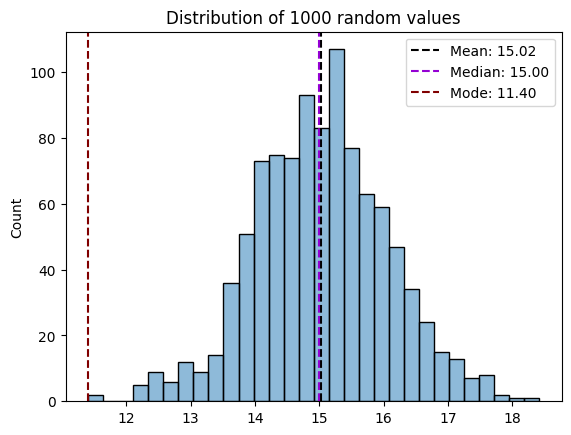

Statistics:
Mean: 15.02
Median: 15.0
Mode: 11.4
Min value: 11.4
Max value: 18.42
Number of unique values: 1000
Total number of values: 1000


,count,mean,std,min,25%,50%,75%,max
Values,1000.0,15.023943,1.03643,11.403908,14.314479,15.002363,15.677492,18.421763


In [7]:
#Apply function
hist_and_statistics(response_time)

The function `hist_and_statistics` displays a minimum value for the mode in the dataset. However, since each value in the dataset is unique, no single value occurs more frequently than others. In fact, the dataset has no mode.

Let's repeat the calculations for an array of int values.

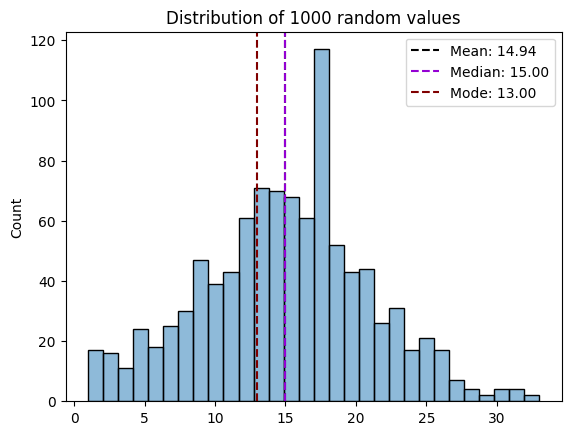

Statistics:
Mean: 14.94
Median: 15.0
Mode: 13
Min value: 1
Max value: 33
Number of unique values: 33
Total number of values: 992


,count,mean,std,min,25%,50%,75%,max
Values,992.0,14.940524,5.999116,1.0,11.0,15.0,19.0,33.0


In [8]:
#Generate the data - 1000 int data points following the normal distribution
data_norm_for_int = np.random.normal(size=1000,loc=0, scale=6)
data_int = np.round(data_norm_for_int).astype(int)

# Shift the mean to 15
new_mean = 15
response_time_int = data_int + new_mean

#filter out values less than 0, since responce time cannot be < 0
response_time_int = np.array([i for i in response_time_int if i > 0])

#Apply function
hist_and_statistics(response_time_int)

Now we can see that the dataset has the mode indeed.

<img src='images/outliers.png'>

### Outliers
Let's see how outliers impact the mean, median, and mode. 
We've got a function called `remove_outliers` that kicks outliers out of our data using something called the interquartile range (IQR). 
Next up, we’ll whip up some data and throw in a few outliers just to see what happens. 
We'll crunch the numbers for the mean, median, and mode before and after cleaning up the data, and then see how they stack up against each other. 
Plotting the data will give us a clear visual of what's changed.

Mean of data with outliers: 15.01; Mean of data without outliers: 14.91.
Median of data with outliers: 15.00; Median of data without outliers: 15.00.
Mode of data with outliers: 13.00; Mode of data without outliers: 13.00.


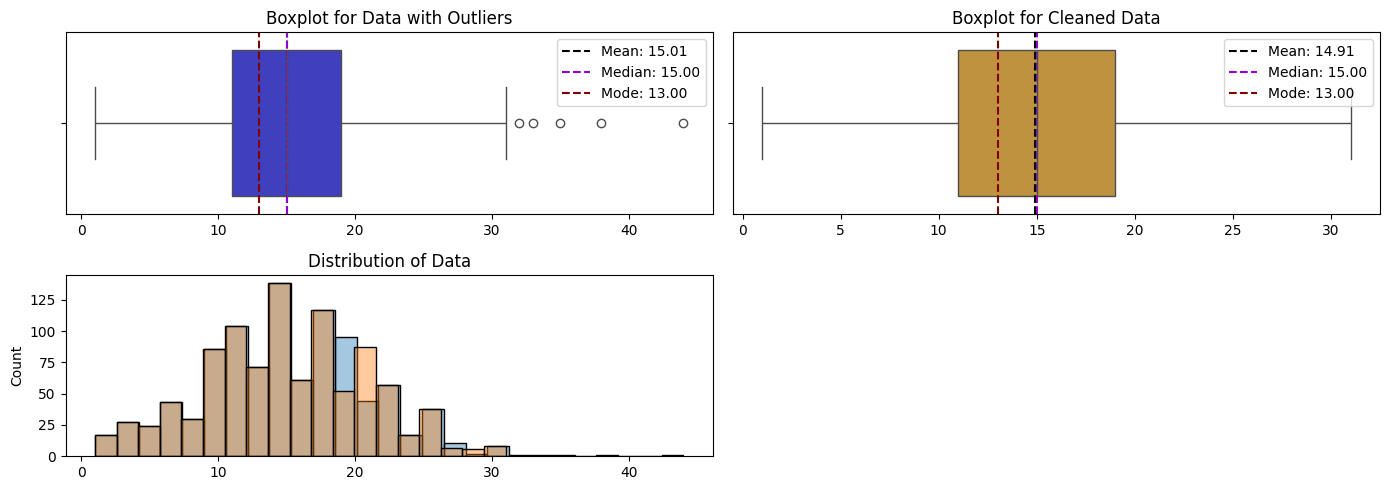

In [10]:
np.random.seed(0)  # For reproducibility

#Write a function to remove outliers with IQR method
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

#---------------------------------------------------------------------------------------------------------------------------------------

#Add outliers to response_time_int data. I add several values as outliers, since they are relatively large for initial data values
data_with_outliers = np.concatenate([response_time_int, [44, 35, 38]])

# Remove outliers. We apply the function remove_outliers to the initial dataset and store the result in the clean_data
cleaned_data = remove_outliers(data_with_outliers)

#---------------------------------------------------------------------------------------------------------------------------------------

#Print metrics out
print(f"\033[1mMean of data with outliers:\033[0m {data_with_outliers.mean():.2f}; \033[1mMean of data without outliers:\033[0m {cleaned_data.mean():.2f}.")
print(f"\033[1mMedian of data with outliers:\033[0m {np.median(data_with_outliers):.2f}; \033[1mMedian of data without outliers:\033[0m {np.median(cleaned_data):.2f}.")
print(f"\033[1mMode of data with outliers:\033[0m {stats.mode(data_with_outliers)[0]:.2f}; \033[1mMode of data without outliers:\033[0m {stats.mode(cleaned_data)[0]:.2f}.")

#---------------------------------------------------------------------------------------------------------------------------------------

#Data plotting function
def add_mean_median_mode_lines(ax, data, mean_color='black', median_color='darkviolet', mode_color='maroon'):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0]  # Taking the first mode value in case of multiple modes

    # Add lines for mean, median, and mode
    ax.axvline(mean, color=mean_color, linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color=median_color, linestyle='--', label=f'Median: {median:.2f}')
    ax.axvline(mode, color=mode_color, linestyle='--', label=f'Mode: {mode:.2f}')

    # Display legend
    ax.legend()

#Plot data
fig, axs = plt.subplots(2,2, figsize = (14,5))
axs[1, 1].remove() # Remove the extra subplot

#Boxplots
sns.boxplot(data_with_outliers, color='blue', saturation=0.5, ax = axs[0,0], orient='h')
sns.boxplot(cleaned_data, color='orange', saturation=0.5, ax = axs[0,1], orient='h')

#Histogramm
#Also, let's plot the histogram to understand how the data looks like, for example, why we have mode equal to 6
sns.histplot(data_with_outliers, alpha = 0.4, ax = axs[1,0])
sns.histplot(cleaned_data,  alpha = 0.4, ax = axs[1,0])

# Add lines for mean, median and mode
add_mean_median_mode_lines(axs[0,0], data_with_outliers)
add_mean_median_mode_lines(axs[0,1], cleaned_data)

# Add titles
axs[0, 0].set_title('Boxplot for Data with Outliers')
axs[0, 1].set_title('Boxplot for Cleaned Data')
axs[1, 0].set_title('Distribution of Data')

plt.tight_layout()

The means differ a little because they are sensitive to outliers, while the median and mode remain the same, showing their stability in the presence of outliers.

Even though outliers can change the mean a bit, the median and the mode in the dataset stay really steady. The median remains constant, and the mean experiences only a minor adjustment when outliers are removed, indicating a robust central tendency. The mode remains unchanged in both scenarios, further confirming its resilience to outliers.

These findings imply that the data is centered around a strong central point, largely unaffected by outliers. In cases of skewed distributions, however, the mean would be more influenced by outliers, tending to drift towards the skew's tail.

<img src='images/distribution.png'>

### Distribution form matters
Let's observe how the form of the distribution affects the mean, the median, and the mode. 
Here, I use three datasets: one follows a normal distribution (`normal_data`), the second follows an exponential distribution (`skewed_data`), and the third follows a uniform distribution (`uniform_data`).

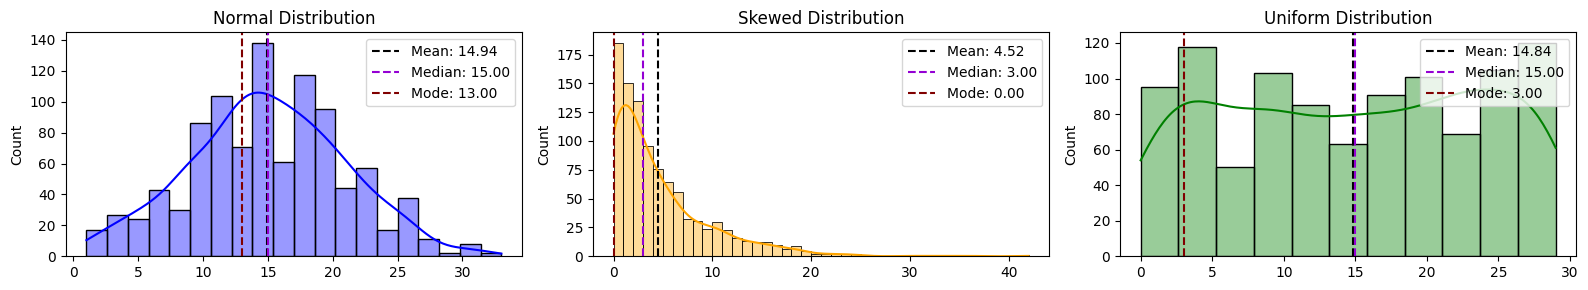

Normal Distribution - Mean: 14.94, Median: 15.00, Mode: 13.00
Skewed Distribution - Mean: 4.52, Median: 3.00, Mode: 0.00
Uniform Distribution - Mean: 14.84, Median: 15.00, Mode: 3.00


In [12]:
np.random.seed(0)  # For reproducibility

# Generate a normally distributed dataset
normal_data = response_time_int
# Generate a skewed dataset
skewed_data = np.array([int(i) for i in np.random.exponential(scale=5.0, size=1000)])  # Exponential distribution is skewed
# Generate an uniform dataset
uniform_data = np.array([int(i) for i in np.random.uniform(low=0, high=30, size=1000)])

#---------------------------------------------------------------------------------------------------------------------------------------

# Function to calculate metrics
def calculate_metrics(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'mode': stats.mode(data)[0]
    }

# Calculate metrics for each dataset
metrics_normal = calculate_metrics(normal_data)
metrics_skewed = calculate_metrics(skewed_data)
metrics_uniform = calculate_metrics(uniform_data)

#---------------------------------------------------------------------------------------------------------------------------------------

# Plotting function
def plot_distribution(ax, data, mean, median, mode,  title, color):
    sns.histplot(data, kde=True, color=color, alpha=0.4, ax=ax)
    ax.set_title(title)
    ax.axvline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='darkviolet', linestyle='--', label=f'Median: {median:.2f}')
    ax.axvline(mode, color='maroon', linestyle='--', label=f'Mode: {mode:.2f}')
    ax.legend(loc='upper right')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

# Plot each distribution using the metrics from the calculate_metrics function
plot_distribution(axs[0], normal_data, metrics_normal['mean'], metrics_normal['median'], metrics_normal['mode'], 'Normal Distribution', 'blue')
plot_distribution(axs[1], skewed_data, metrics_skewed['mean'], metrics_skewed['median'], metrics_skewed['mode'], 'Skewed Distribution', 'orange')
plot_distribution(axs[2], uniform_data, metrics_uniform['mean'], metrics_uniform['median'], metrics_uniform['mode'], 'Uniform Distribution', 'green')

plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------------------------------------------------------

# Print mean, median, and mode for both datasets
print(f"\033[1mNormal Distribution\033[0m - Mean: {metrics_normal['mean']:.2f}, Median: {metrics_normal['median']:.2f}, Mode: {metrics_normal['mode']:.2f}")
print(f"\033[1mSkewed Distribution\033[0m - Mean: {metrics_skewed['mean']:.2f}, Median: {metrics_skewed['median']:.2f}, Mode: {metrics_skewed['mode']:.2f}")
print(f"\033[1mUniform Distribution\033[0m - Mean: {metrics_uniform['mean']:.2f}, Median: {metrics_uniform['median']:.2f}, Mode: {metrics_uniform['mode']:.2f}")

**In summary we can see that:**
* **Normal Distribution**: The mean, median, and mode are nearly the same, indicating symmetry around the central peak. 
* **Skewed Distribution**: The mean is less than the median, suggesting a left skew with a tail stretching towards lower values. 
For an exponential distribution, the mode is always 0 if the distribution is not shifted. 
* **Uniform Distribution**: The mean and median are close together, but the presence of a distinct mode is atypical for a true uniform distribution, so we cannot interpret it here.



### Distribution formulas
Let's have a closer look, how mean, median and mode are calculated for each type of distribution.
- **Normal Distribution**: All the same value (μ) for mean, median, and mode. The normal distribution is defined by two parameters: the mean (μ) and the standard deviation (σ). We will talk about the later measure next time.
Mean|Median|Mode: $$ \mu $$
----------
- **Exponential Distribution**:
- Mean: $$ \frac{1}{\lambda} $$
- Median: $$ \frac{\ln(2)}{\lambda} $$
- Mode: $$ 0 $$
------------
- **Uniform Distribution**:
- Mean|Median: $$ \frac{a + b}{2} $$
- Mode: Not defined for a continuous uniform distribution.

<img src='images/key_points.png'>

### Key Points to Consider:

* **Outliers:** If your data has outliers, the mean can be misleading. In such cases, the median is a better measure of central tendency.

* **Distribution Shape:** For symmetric distributions, the mean, median, and mode are the same. In skewed distributions, they differ, and the median often better represents the center of the data.

* **Data Type:** The mean requires numeric, interval or ratio data (where mathematical operations like addition and subtraction are meaningful). The median and mode can be used with ordinal data, and the mode can even be used with nominal data.

Below, there are examples showing exactly how the presence of outliers and the shape of the distribution can affect the mean, median, and mode.

<img src='images/examples.png'>

### Examples

**When to Use Mean:**
* Product Analytics: Average time spent on a website or app - useful for understanding user engagement.
* Product Analytics: Average revenue per user (ARPU) - crucial for assessing the profitability of a product.
* Product Analytics: Average cost of goods sold - to understand the typical cost involved in producing goods.
* General: Average temperatures over a month - for climatic analysis.
* General: Average scores in a standardized test - to assess overall performance.
* General: Average age of employees in a company - useful for HR demographic analysis.

**When to Use Median:**
* Product Analytics: Median transaction value - to understand typical customer spending, especially when there are a few very large or small transactions.
* Product Analytics: Median time to purchase from first website visit - gives a better sense of a typical customer journey, unaffected by extreme outliers.
* Product Analytics: Median load time of a webpage - to gauge user experience, as extremely slow loads can skew the mean.
* General: Median income in a survey - gives a more realistic measure of central income, especially in the presence of extreme values.
* General: Median house prices in real estate - to understand the market's central price point, which isn't skewed by extremely high or low property values.
* General: Median age in a population study - useful in demographics, especially in populations with age extremes.

**When to Use Mode:**
* Product Analytics: Most common product category purchased - to determine which category is most popular among customers.
* Product Analytics: Mode of payment methods used in transactions - to understand the most preferred payment method by customers.
* Product Analytics: Most frequent time of day for app usage - helps in targeting specific times for marketing or maintenance.
* General: Mode shoe size sold in a retail store - to optimize inventory for the most demanded sizes.
* General: Most common car color chosen by buyers - useful for manufacturing decisions.
* General: Most preferred type of content (e.g., videos, blogs, infographics) on a website - helps in content strategy.

<img src='images/conclusion.png'>

And that's a wrap on mean, median and mode! These are fundamental concepts for understanding central tendencies in data.
Thanks for walking through this with me. Your feedback is always welcome!
Happy wombalyzing!
<pre>                                                                                                                
     @@                 @@      
   @  .@@@            @@@  @@ 
  @@  @@  @@@@@@@@@@@   @@  @ 
   @@@@*                *@@@   
     @.                   @    
    @@    @@        @@    @@    
    @,       @@@@@@        @   
    @         @@@@         @  
     @      \__/\__/      @   
       @@@            @@@       
           @@@@@@@@@@            